# Test tcadata
- quick tests not good coverage unit tests 

## IMPORTS

In [1]:
__author__ = 'BruceCottman'
__license__ = 'MIT'
__author__,__license__

('BruceCottman', 'MIT')

In [2]:
import pdb

In [3]:
!conda list

# packages in environment at /Users/brucecottman/anaconda3/envs/paso:
#
# Name                    Version                   Build  Channel
_ipyw_jlab_nb_ext_conf    0.1.0                    py37_0  
absl-py                   0.7.0                    pypi_0    pypi
alabaster                 0.7.12                   py37_0  
anaconda-client           1.7.2                    py37_0  
anaconda-navigator        1.9.6                    py37_0  
anaconda-project          0.8.2                    py37_0  
appnope                   0.1.0                    py37_0  
appscript                 1.0.1            py37h1de35cc_1  
asn1crypto                0.24.0                   py37_0  
astor                     0.7.1                    pypi_0    pypi
astroid                   2.1.0                    py37_0  
astropy                   3.1              py37h1de35cc_0  
atomicwrites              1.2.1                    py37_0  
attrdict                  2.0.1                    pypi_0    pypi
att

In [4]:
import math
import pandas as pd
from pandas.util._validators import validate_bool_kwarg
import warnings

warnings.filterwarnings("ignore")

import numpy as np
from tqdm import tqdm
#from numba import jit

In [5]:
from __future__ import print_function
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline
import probscale
import seaborn as sns

%reload_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib



In [6]:
import os,sys
sys.path

['/Users/brucecottman/Documents/PROJECTS/jule/test',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python37.zip',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python3.7',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python3.7/lib-dynload',
 '',
 '/Users/brucecottman/.local/lib/python3.7/site-packages',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python3.7/site-packages',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python3.7/site-packages/aeosa',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python3.7/site-packages/IPython/extensions',
 '/Users/brucecottman/.ipython']

this is necessary as not a package

it this set somewhere else as notebooks reside in different directory than .py files.

or is there something i need to learn?



In [7]:
__file__ = !cd ../;pwd
__file__ = __file__[0]
sys.path.append(__file__)
sys.path


['/Users/brucecottman/Documents/PROJECTS/jule/test',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python37.zip',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python3.7',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python3.7/lib-dynload',
 '',
 '/Users/brucecottman/.local/lib/python3.7/site-packages',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python3.7/site-packages',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python3.7/site-packages/aeosa',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python3.7/site-packages/IPython/extensions',
 '/Users/brucecottman/.ipython',
 '/Users/brucecottman/Documents/PROJECTS/jule']

In [8]:
from jule.base import *

Using TensorFlow backend.


## TEST SPARK INSTALLATION

does not work ocorrectly (.close)

need to step back and install correctly

worry about sandbox later
- version problem


In [9]:
import findspark 
import pyspark 
import pyarrow.parquet as pq
from pyspark import SparkContext
from pyspark.sql import SparkSession
findspark.init() 
sc = SparkContext(appName="MyFiFooBarrstApp") 
spark = SparkSession(sc) 
print("Hello World!") 
# check out class sc.close() #closing the spark session    import findspark from pyspark 
# .close nmaybe 1.x stuff have to look at docabs# put tca code to test

Hello World!


## Parameter file service

In [10]:
para_D = parameters().parameters_D
for i in para_D.items():
    print(i)

('project', 'Common Ground Soltions/jule')
('cpu_n', 12)
('threads_n', 24)
('gpu_n', 0)
('Conv2D', {'deep': True, 'block': 1, 'input_s': [100, 100, 3], 'n_class': 10, 'dropout': [0.25, 0.25], 'optimizer': 'RMSprop', 'loss': 'categorical_crossentropy'})


In [11]:
para_D['Conv2D']['n_class']

10

## Model class

### test simple VGG like model

    model.compile(loss='categorical_crossentropy', optimizer=sgd)
    model.add(Dense(10, activation='softmax')
 
 will cause to collate into 10 thing of binary probability of 0/1

In [12]:
model = Sequential()
# input: 100x100 images with 3 channels -> (100, 100, 3) tensors.
# this applies 32 convolution filters of size 3x3 each.
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [13]:
print_summary(model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0         
__________

### test CNN,  VGG like method

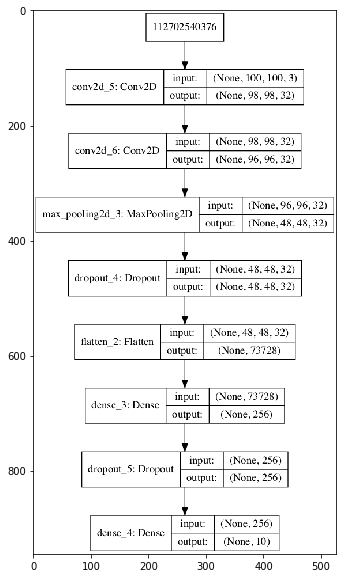

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 48, 48, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 73728)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               18874624  
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
__________

In [14]:
model = CNN().block().Conv2D().plot().info()

In [15]:
model.compile()